In [3]:
import pandas as pd
from matplotlib import pyplot as plt

# Part 1: Predicting Hackernews Points With Linear Regression in One Variable

For this part we would like to predict how long a user has to be active from signing up on Hackernews, to achieve 1000 points. In this experiment our input variable is time and our output variable is points. X (time) and Y (points).

## Part 1.1: Data preprocessing

Your job is to build and train a model that predicts how long a new user will have to work to accumulate 1000 points.

Before you can know what model to use, have a look at the data: load it into a Pandas DataFrame and plot it on a graph. Remember to make your X-axis equal the time feature (since user's registration on Hackernews), and your Y-axis the number of points.

<img src="plots/plot_1_1.png"
     alt="Detailed view"
     style="float: left; margin-right: 2px;" />

In [4]:
df = pd.read_json('./users.json')
df = df[df['created'].notnull()]
df.head()

,id,created,karma,submitted,about,error
0,gcgggfxsdg,1.510266e+09,-1.0,5,NaN,NaN
1,sheerun,1.325548e+09,102.0,51,"Ruby, Open Source, Devops",NaN
2,keypress,1.459331e+09,79.0,70,NaN,NaN
3,pyprism,1.379698e+09,1356.0,114,[ my public key: https:&#x2F;&#x2F;keybase.io&...,NaN
4,ejstronge,1.355740e+09,460.0,144,Email: ejstronge@gmail.com\nGithub: https:&#x2...,NaN


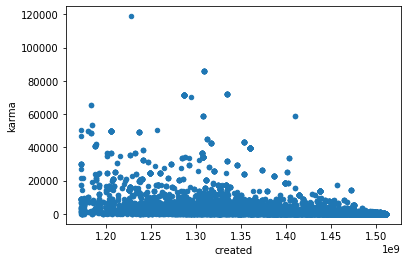

In [5]:
df.plot.scatter(x="created", y="karma")
plt.savefig('./plots/plot_1_1.png')

## Part 1.2: Model selection

The next part is to select an appropriate model. Study your data either visually or by going through the .csv file; what are you finding? What kind of model would it fit?

We choose the ElasticNet Lasso. We used the picture below to decide which algorithm to use.
You can use the steps below to see the path we took.

1. We have more than 50 samples.

2. We are not predicting a category

3. We are predicting a quantity

4. We have less than 100 K samples

5. Few features should be important

<img src="https://cdn-images-1.medium.com/max/2000/1*dYgEs2roROf3j2ANzkDHMA.png"
     alt="Detailed view"
     style="float: left; margin-right: 2px;" />

## Part 1.3: Model training

Next you'll must train your model. Remember the ML life cycle...

The training step will require you to create your selected model using one of the sklearn ML model classes (check cheat sheet again). Feed it data to train it.

```python
model = ElasticNet(random_state=0)
model.fit(X_train,y_train)

```

In [6]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [13]:
# Rehape the arrays
karma = np.array(df.karma).reshape(9299, 1)
created = np.array(df.created).reshape(9299, 1)

X_train, X_test, y_train, y_test = train_test_split(created, karma, test_size=0.20, random_state=42)

#instantiating the model and trains the data.
model = ElasticNet(random_state=0)
model.fit(X_train,y_train)

#predicting
y_predicted = model.predict(X_test)

# The coefficients
print('Coefficients: {} \n'.format(model.coef_[0]))
# The mean squared error
print("Mean squared error: %.2f\n"
      % mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(y_test, y_predicted))
print('The b value is {}'.format(model.intercept_[0]))

Coefficients: -3.755344040619037e-05 

Mean squared error: 66927243.03

Variance score: 0.12

The b value is 55930.70557937633


## Part 1.4: Model Validation

Now that you have a trained model you will need to validate it (check ML Wheel again).

Validate your model. This should be done both intuitively, computationally, and visually.

Outcome 1.4: Hand-in ...


- A one-page description of the model parameters -- number of which are model dependent: Why are they there? What is their purpose in the model? What do they explain for your data? How are they helping you to predict how much time you need to be active in order to gain Hackernews points? 

The model uses the column 'Karma' as the Y-value. 'Karma' is the amount of points an user have accumulated. The column 'Created' is the X-value. It is a unix timestamp of when the user created their account.

- A visual plot of the model that explains the description above. In the case of a linear regression this is a line that shows how the model expects how long a user needs to be active (x value) in order to get a certain number of points (y value).

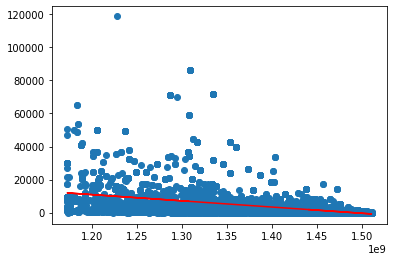

In [15]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_predicted,'r')
#plt.ylim(0, 10000)
plt.show()

- Explain: What does it take to get 1000 points? How long would you have to be active on Hackernews?

In [16]:
(1000-55930.70557937633)/-3.755344040619037e-05

1462734305.7048233

The result is 1462734305.7048233 which translate to 20/05/2016. So if you created your account before or on this data 20/05/2016. You should have a minimum of 1000 points.

- Explain: how you have sanity checked your resulting trained/validated model: What does it take to get 1000 points? 500 points? 10000 points? 100 points? How long would you have to be active on Hackernews in those cases?

In [18]:
creat_and_submit = np.array(df[['created','submitted']]).reshape(9299, 2)

# Part 2: Predicting Hackernews Points With Multivariate Linear Regression

- A description of the parameters

The model parameteres are the same as earlier, except now we have an extra feature which is the "submitted" 

 - An analysis of how much time you need to be active on Hackernews, plus how many posts you need to reach 1000 points.

In [24]:

X_train, X_test, y_train, y_test = train_test_split(creat_and_submit, karma, test_size=0.20, random_state=42)

#instantiating the model and trains the data.
model = ElasticNet(random_state=0)
model.fit(X_train,y_train)

#predicting
y_predicted = model.predict(X_test)

# The coefficients
print('Coefficients: {} \n'.format(model.coef_))
# The mean squared error
print("Mean squared error: %.2f\n"
      % mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(y_test, y_predicted))
print('The b value is {}'.format(model.intercept_))

Coefficients: [-6.67047685e-06  2.66069863e+00] 

Mean squared error: 23894959.27

Variance score: 0.69

The b value is [9575.89574735]


- Explain: how much does the number of posts contribute to get the points? How much do the time since registration explain?

The number of posts contribute this much 2.66069863 and the time since registration contributes this much -6.67047685e-06 

# Part 3: Prediction of breast cancer malignity

## Part 3.1: Looking at the data

In [57]:
wdbc_data = pd.read_csv('wdbc.data.csv')

### Report the head of the table

In [58]:
wdbc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Write two lines about notable features of the data

The most noteable features is the "Diagnosis" column, which appears to be a binary value in the sense that it can only be one of two values, either 'M' og 'B'.

In [59]:
wdbc_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### How big is your dataset ?

In [60]:
print('the size of the dataset is {}'.format(wdbc_data.shape))

the size of the dataset is (569, 33)


## Part 3.2: Building the model

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

The first step is to clean the data we need our feature set and labels. Our labels will be diagnosis. We have to change the labels to numbers instead of letters. We can do this by using the labelencoder .

In [44]:
le = LabelEncoder()
wdbc_data['diagnosis'] = le.fit_transform(wdbc_data['diagnosis'])

In [45]:
wdbc_data['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Now we have to create our featureset. The dataframe contain some columns, that we dont wanna include in the featureset. These are id, diagnosis and Unnamed: 32 

In [49]:
X = wdbc_data.drop(['diagnosis', 'id', 'Unnamed: 32'], axis =1)

We prepare the data by creating a train and test set

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,wdbc_data.diagnosis, test_size = 0.30, random_state =42)


### Part 3.3 Evaluating the model

Now take the data from dataset and train your chosen model. To figure out how good your model was, use the function here sklearn.metrics.accuracy_score. It gives you an accuracy that tells you how good your model is able to predict whether a tumor is benign or malignant.


In [50]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train,y_train)

/Users/pravien/Documents/Software_dev/semester_2/bi/venv-bi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_predict = model_log.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test,y_predict)

In [55]:
"The accuracy of the accuracy score is {}".format(accuracy)

'The accuracy of the accuracy score is 0.9649122807017544'

- five lines describing what that number of accuracy actually means.

The accuracy score tell us how often the model predicts the correct value.

- is the data set 'balanced'?

In [56]:
wdbc_data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

No the dataset is no balanced. there is only 212 M.

- should a ROC curve-based or perhaps a precision-recall optimization be used here?

We can use a precision-recall curve because the dataset is unbalanced.

- what can the number tell you when you inform patiens whether their cancer is benign or malign?

- do you dare do synthetic minority oversampling synthesis (SMOTE) -- if needed (check labelling 'balance') -- on this data to obtain higher accuracy? (this is a serious question if you are working in health care for real!)

I dont think this will be a good idea. Because using SMOTE may balance the dataset, but it might make cause the classifier to be trained wrongly because the data we provide when using SMOTE, isnt real data.